---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you'll train several models and evaluate how effectively they predict instances of fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    
    return len(df[df['Class'] == 1])/float(len(df))

answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    clf = DummyClassifier(strategy='most_frequent',random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return tuple((clf.score(X_test, y_test), (recall_score(y_test, y_pred))))

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    a_score = clf.score(X_test, y_test)
    r_score = recall_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)   
    
    return ((a_score, r_score, p_score))

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    clf = SVC(C=1e9, gamma=1e-07)
    clf.fit(X_train, y_train)
    
    predicted = clf.decision_function(X_test) > -220
    
    return confusion_matrix(y_test, predicted)

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


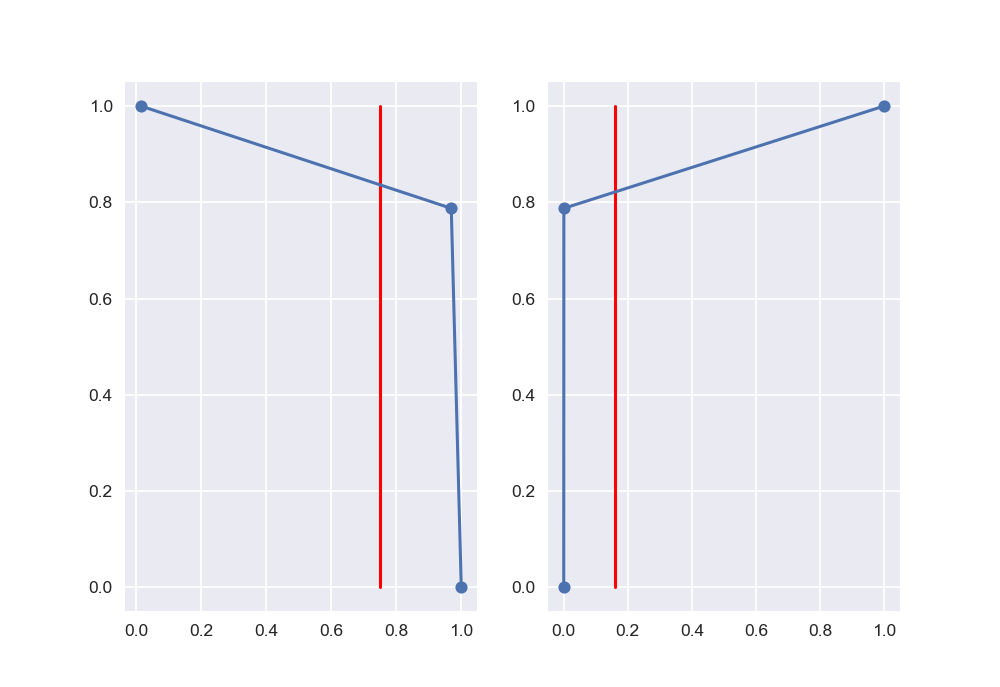

(0.82, 0.81)

In [10]:
import matplotlib.pyplot as plt

def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.grid(True)
    ax1.plot((0.75, 0.75), (0.0, 1.0), 'r-')
    ax1.plot(precision, recall, '-o')
    ax2.grid(True)
    ax2.plot((0.16, 0.16), (0.0, 1.0), 'r-')
    ax2.plot(fpr, tpr, '-o')
    plt.show()
     
    return tuple((0.82, 0.81))

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    tuned_parameters = [{'penalty': ['l1', 'l2'],
                         'C':[0.01, 0.1, 1, 10, 100]}]
    grid= GridSearchCV(LogisticRegression(), tuned_parameters, scoring='recall')
    grid.fit(X_train, y_train)
    
    data = []
    for mean, params in zip(grid.cv_results_['mean_test_score'], grid.cv_results_['params']):
        new_frame = dict(params)
        new_frame['mean'] = mean
        data.append(new_frame)
    
    df = pd.DataFrame(data).pivot('C', 'penalty', 'mean')
    return pd.DataFrame(df.values, columns=df.columns.tolist(), index=df.index.tolist()).values

answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.8115942 ]])

<IPython.core.display.Javascript object>


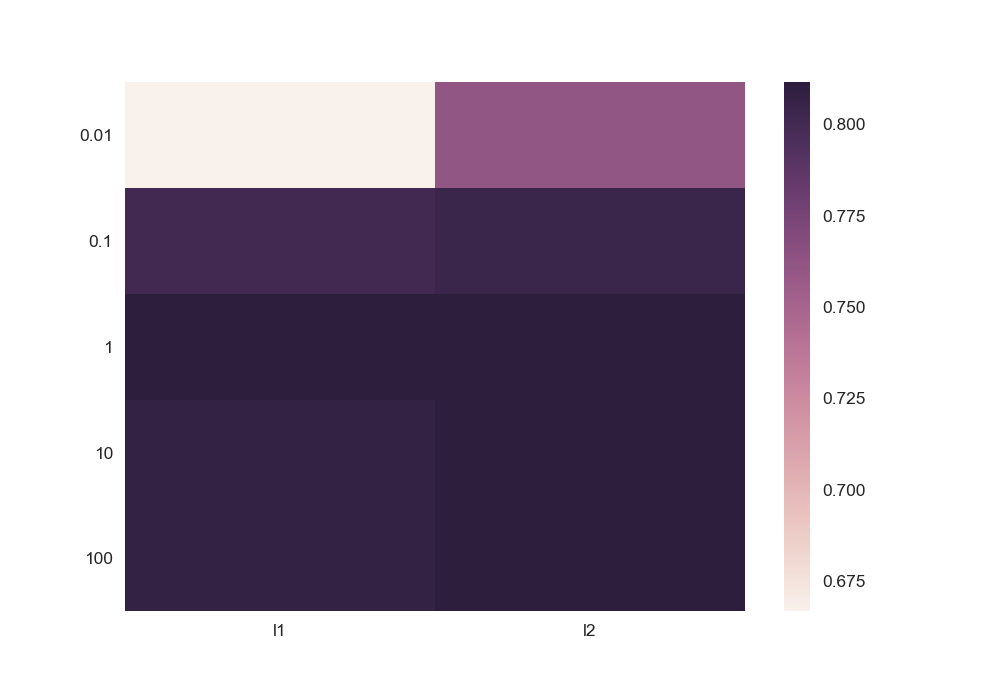

In [9]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())